<a href="https://colab.research.google.com/github/vvrgit/ML-Optimization/blob/main/AdaGrad_Assignmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

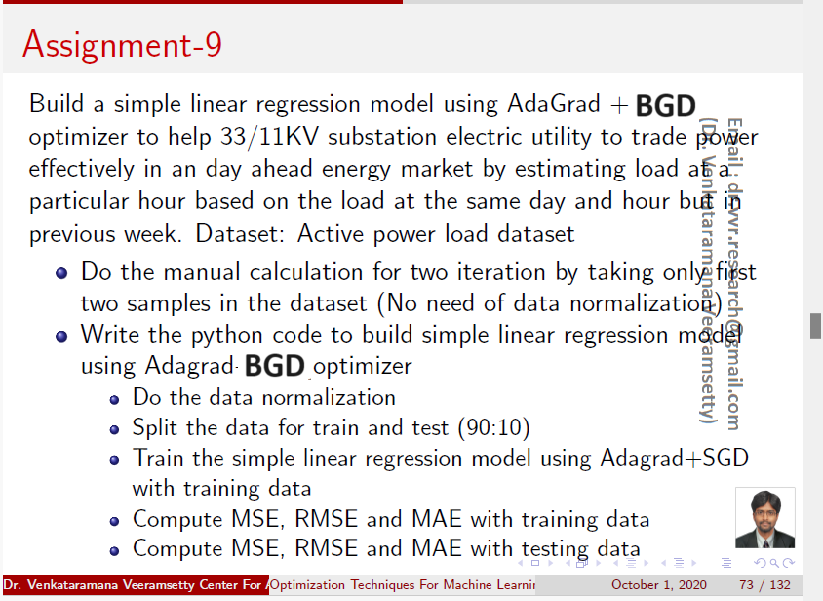

**Import Libraries**

In [1]:
import numpy as np
import math as mt
import random
import pandas as pd

**Load Data**

In [7]:
data = pd.read_csv('/content/Dataset-AdaGrad-Assignment.csv')
data.head()

,L(T-168),L(T)
0,5551.82208,5346.52812
1,4983.17184,5138.89596
2,4888.39680,4940.77248
3,5072.95872,4766.18688
4,5196.25980,5020.11540


**Min Max Values**

In [9]:
IP_min=data['L(T-168)'].min()
IP_max=data['L(T-168)'].max()
OP_min=data['L(T)'].min()
OP_max=data['L(T)'].max()

**Data Normalization**

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data_norm=scaler.transform(data)
data_norm

array([[0.39751641, 0.36030356],
       [0.29337711, 0.32230179],
       [0.27602055, 0.28604034],
       ...,
       [0.62292321, 0.24629825],
       [0.48983728, 0.32438447],
       [0.09691693, 0.65165045]])

**2D Array to data frame**

In [12]:
import pandas as pd
data_norm=pd.DataFrame(data_norm,columns=['IP','OP'])
data_norm.head()

,IP,OP
0,0.397516,0.360304
1,0.293377,0.322302
2,0.276021,0.286040
3,0.309820,0.254087
4,0.332401,0.300562


# **Data Split**

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_norm.IP, data_norm.OP, test_size = 0.10, random_state = 10)

**Initialization**

In [14]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.9
max_iter=10000
ssg_m = 0
ssg_c = 0
eps=mt.pow(10,-8)

**Gradient Calculation**

In [15]:
def gradient(m,c,x,y):
  m_deriv=-1*(y-m*x-c)*x
  c_deriv=-1*(y-m*x-c)
  return m_deriv,c_deriv

**Model Training**

In [16]:
for iter in range(max_iter):
  del_m,del_c=0.0,0.0
  for sample in range(x_train.shape[0]):
    delm,delc=gradient(m,c,x_train.iloc[sample], y_train.iloc[sample])
    del_m=del_m+delm
    del_c=del_c+delc
  del_m=del_m/len(x_train)
  del_c=del_c/len(x_train)
  ssg_m=ssg_m+(del_m*del_m)
  ssg_c=ssg_c+(del_c*del_c)
  m=m-(eta*del_m)/(mt.sqrt(ssg_m+eps))
  c=c-(eta*del_c)/(mt.sqrt(ssg_c+eps))
  #print(f"Iteration: {iter}\tValue of m: {m}, \tValue of c: {c}")

print(f"\nThe local minima occurs at: {m}, {c}")


The local minima occurs at: 0.5023285258562139, 0.2318898198999216


**Training MSE**

In [17]:
q2=len(x_train)
error=0;
for j in range(q2):
    n2=m*x_train.iloc[j]+c
    error=error+(y_train.iloc[j]-n2)**2
error=error/q2
error

0.029940914267548423

**Testing MSE**

In [18]:
q1=len(x_test)
error=0;
for j in range(q1):
    n2=m*x_test.iloc[j]+c
    error=error+(y_test.iloc[j]-n2)**2
error=error/q2
error

0.003430941573211809

**Model Deployment**

In [19]:
X=input('enter load value')
print('X=',X)
X_norm=(float(X)-IP_min)/(IP_max-IP_min)
print('X_norm=',X_norm)
Y_norm=m*float(X_norm)+c
Y=Y_norm*(OP_max-OP_min)+OP_min
print('Weight of nitrogen=',Y)

enter load value5000
X= 5000
X_norm= 0.2964589170278256
Weight of nitrogen= 5458.567955312069


# ***Thank You***